In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [4]:
plt.style.use("fivethirtyeight")

In [5]:
movies = pd.read_csv('/content/imdb_top_1000.csv')
display(movies.head())
# Removing statistically unrelated info
movies = movies.drop(['Poster_Link','Star1','Star2','Star3','Star4','Overview'], axis=1)
# Apollo 13's release date is an outlier/missing
movies.loc[movies.Released_Year=="PG",'Released_Year']=1995
movies['Gross'] = movies['Gross'].str.replace(',', '').astype(float)
movies['Runtime'] = movies['Runtime'].str.replace(' min', '').astype(float)
movies['Released_Year'] = movies['Released_Year'].astype(float)
# Without rubbish
display(movies)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,No_of_Votes,Gross
0,The Shawshank Redemption,1994.0,A,142.0,Drama,9.3,80.0,Frank Darabont,2343110,28341469.0
1,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,100.0,Francis Ford Coppola,1620367,134966411.0
2,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,2303232,534858444.0
3,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,90.0,Francis Ford Coppola,1129952,57300000.0
4,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,96.0,Sidney Lumet,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961.0,A,115.0,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,166544,NaN
996,Giant,1956.0,G,201.0,"Drama, Western",7.6,84.0,George Stevens,34075,NaN
997,From Here to Eternity,1953.0,Passed,118.0,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,43374,30500000.0
998,Lifeboat,1944.0,NaN,97.0,"Drama, War",7.6,78.0,Alfred Hitchcock,26471,NaN


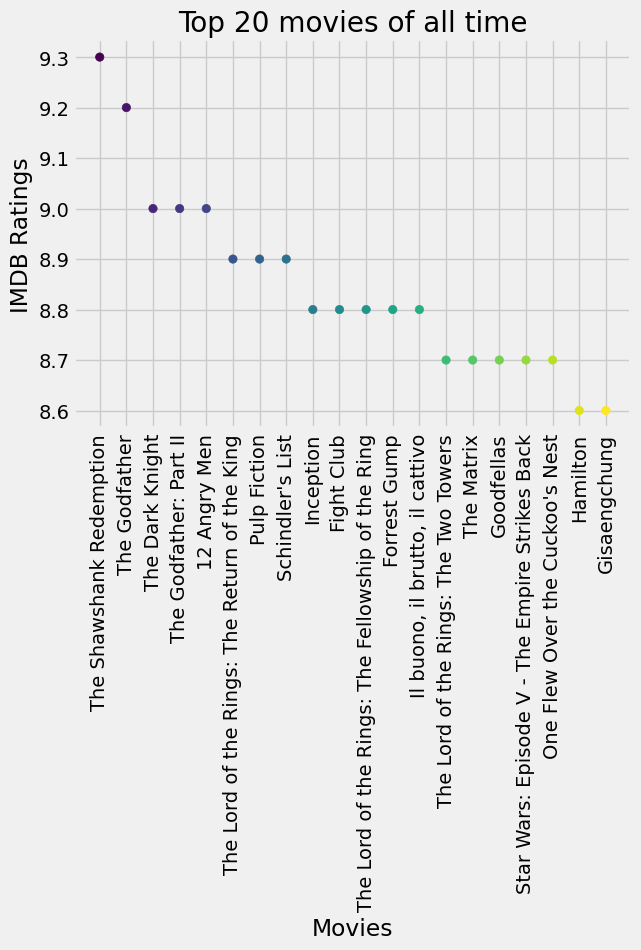

In [6]:
colors = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])
plt.scatter(x=movies.iloc[0:20,0],y=movies.IMDB_Rating[0:20], c=colors, cmap='viridis')
plt.xlabel("Movies")
plt.ylabel("IMDB Ratings")
plt.title('Top 20 movies of all time')
plt.tick_params(axis='x',rotation=90)
plt.show()

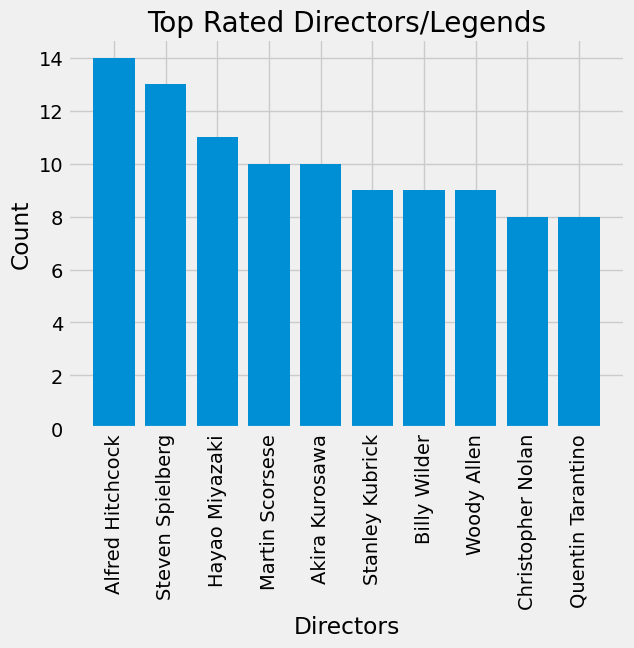

In [7]:
plt.bar(movies['Director'].value_counts()[0:10].index, movies['Director'].value_counts()[0:10])
plt.xlabel('Directors')
plt.ylabel('Count')
plt.title('Top Rated Directors/Legends')
plt.tick_params(axis='x', rotation=90)
plt.show()

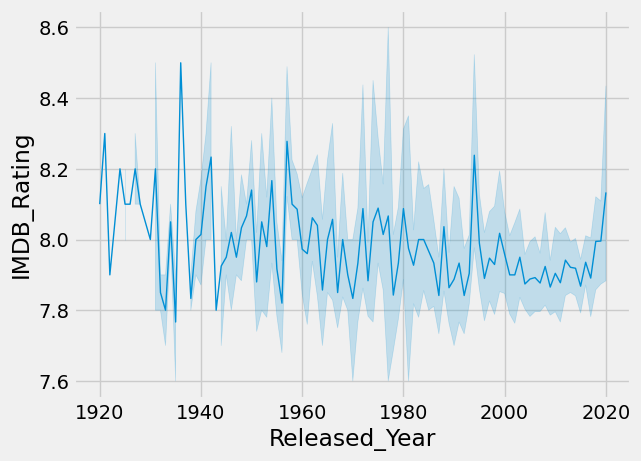

In [8]:
sns.lineplot(data=movies,x='Released_Year',y='IMDB_Rating', linewidth=1)
plt.show()

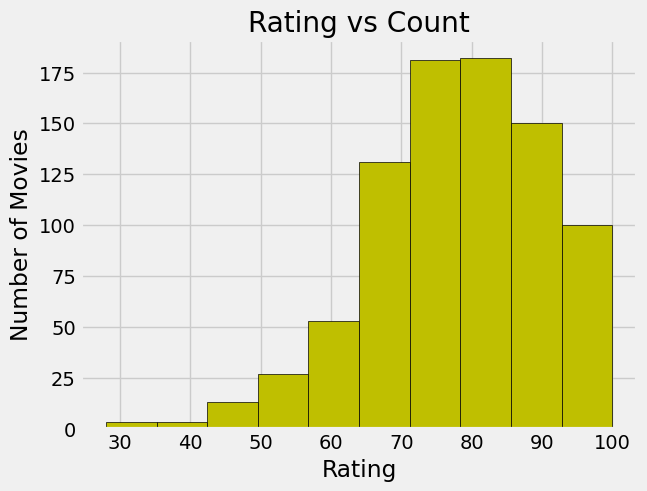

In [9]:
plt.hist(movies['Meta_score'], facecolor='y', edgecolor='k', bins=10)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Rating vs Count')
plt.show()

<ipython-input-10-85f25bd3c20c>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


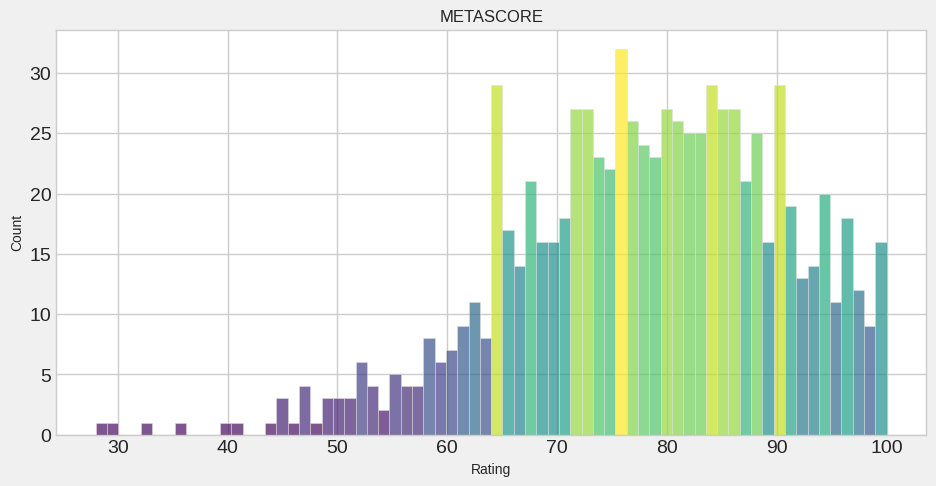

In [10]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(movies['Meta_score'], bins=70, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
n = n.astype('int')

# Accessing each bin, changing color according to height
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

plt.title('METASCORE', fontsize=12)
plt.xlabel('Rating', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

# Histogram style: https://github.com/arseniyturin/Matplotlib-Histogram/blob/master/histogram.ipynb

<Figure size 2000x2000 with 0 Axes>

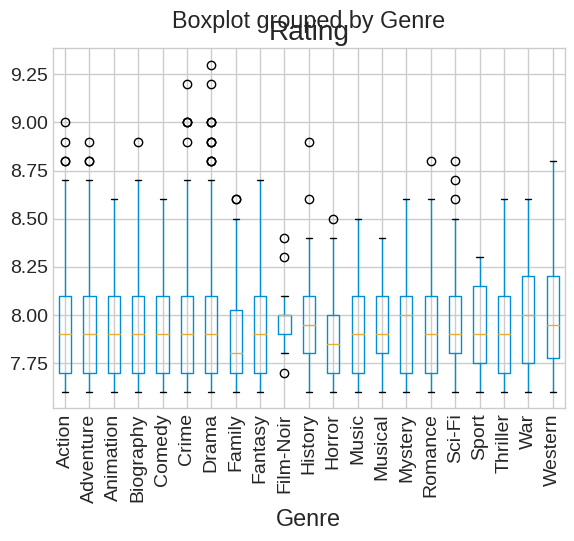

In [11]:
plt.figure(figsize=(20,20))
genres = movies['Genre'].str.split(', ')
data = {'Movie': movies['Series_Title'].repeat(genres.str.len()), 'Genre': genres.explode(), 'Rating': movies['IMDB_Rating'].repeat(genres.str.len())}
pd.DataFrame(data).boxplot(by='Genre', column='Rating', rot=90)
plt.show()

<ipython-input-12-d1a13398ca0e>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(x=movies.IMDB_Rating, hue=movies.Certificate, kind="kde")
<ipython-input-12-d1a13398ca0e>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(x=movies.IMDB_Rating, hue=movies.Certificate, kind="kde")


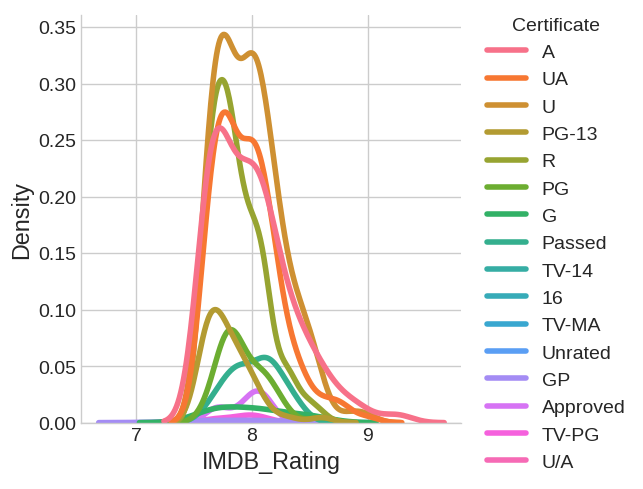

In [12]:
sns.displot(x=movies.IMDB_Rating, hue=movies.Certificate, kind="kde")

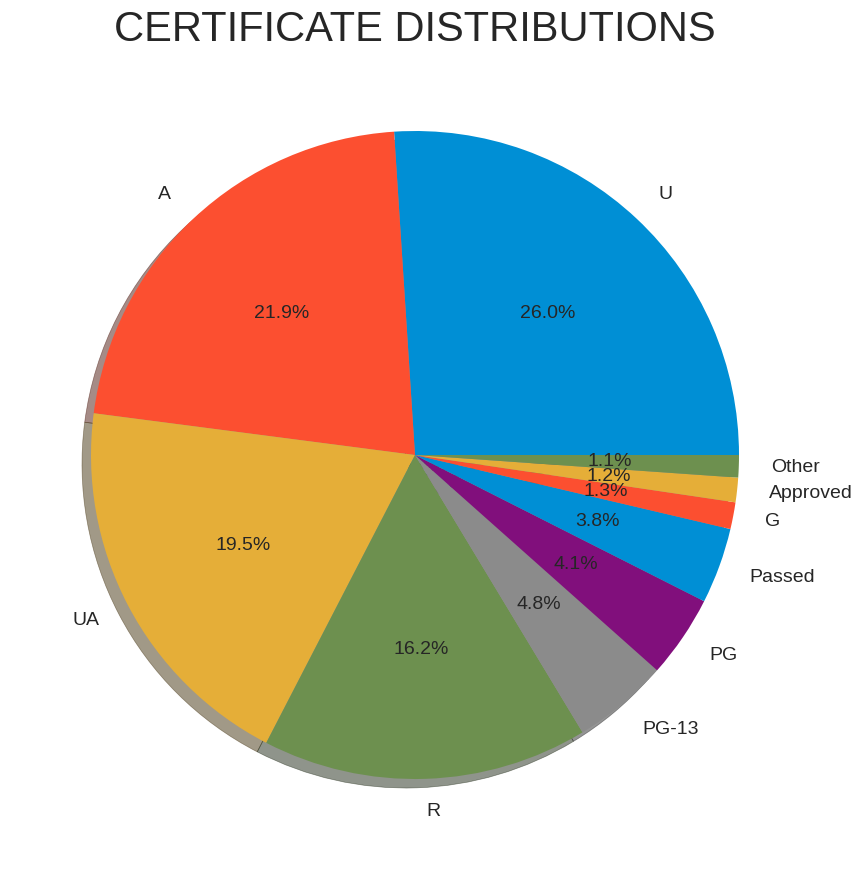

In [13]:
plt.figure(figsize=(10,10))
c = movies['Certificate'].value_counts()
total = c.sum()

other = c[c/total < 0.01].sum()
c = c[c/ total >= 0.01]
c['Other'] = other

plt.pie(c, labels=c.index, autopct = '%1.1f%%', shadow=True)
plt.title("CERTIFICATE DISTRIBUTIONS", fontsize=30)
plt.show()

<Axes: xlabel='IMDB_Rating', ylabel='count'>

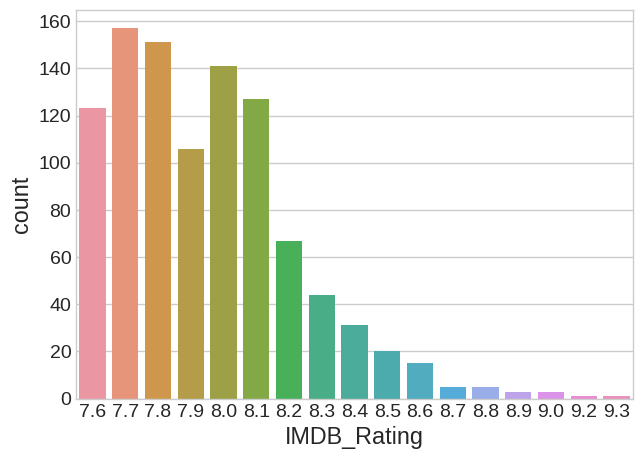

In [14]:
sns.countplot(x=movies.IMDB_Rating)

<ipython-input-15-2010bada65b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = movies.corr()


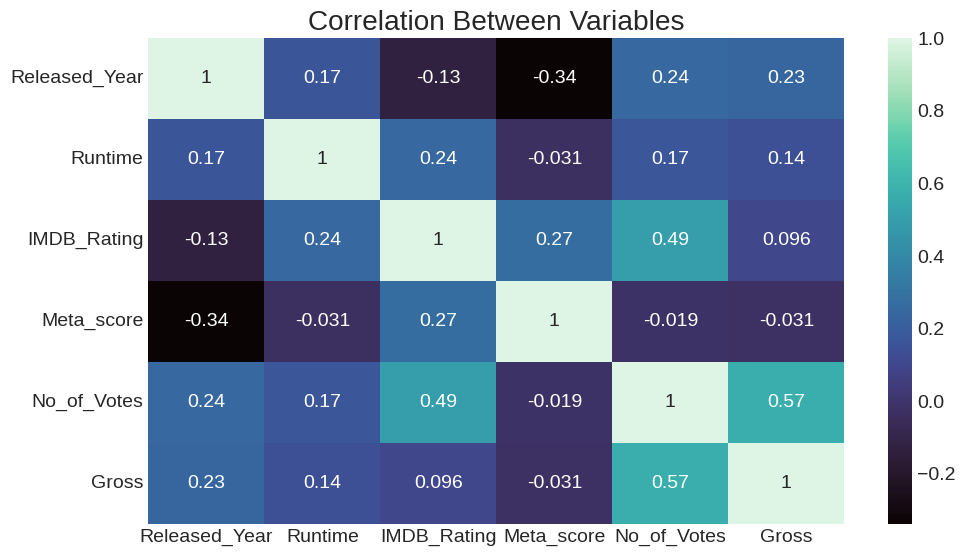

In [15]:
corr = movies.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='mako')
plt.title('Correlation Between Variables')
plt.show()

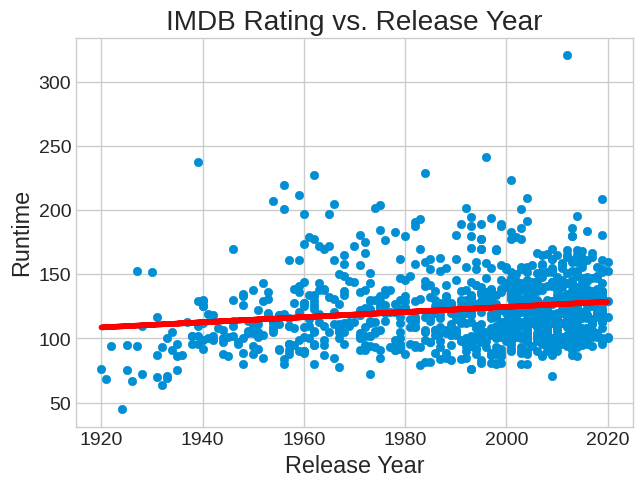

In [16]:
y = movies['Runtime']
X = movies[['Released_Year']]
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')

plt.xlabel('Release Year')
plt.ylabel('Runtime')
plt.locator_params(axis='y', nbins=10)
plt.title('IMDB Rating vs. Release Year')

plt.show()

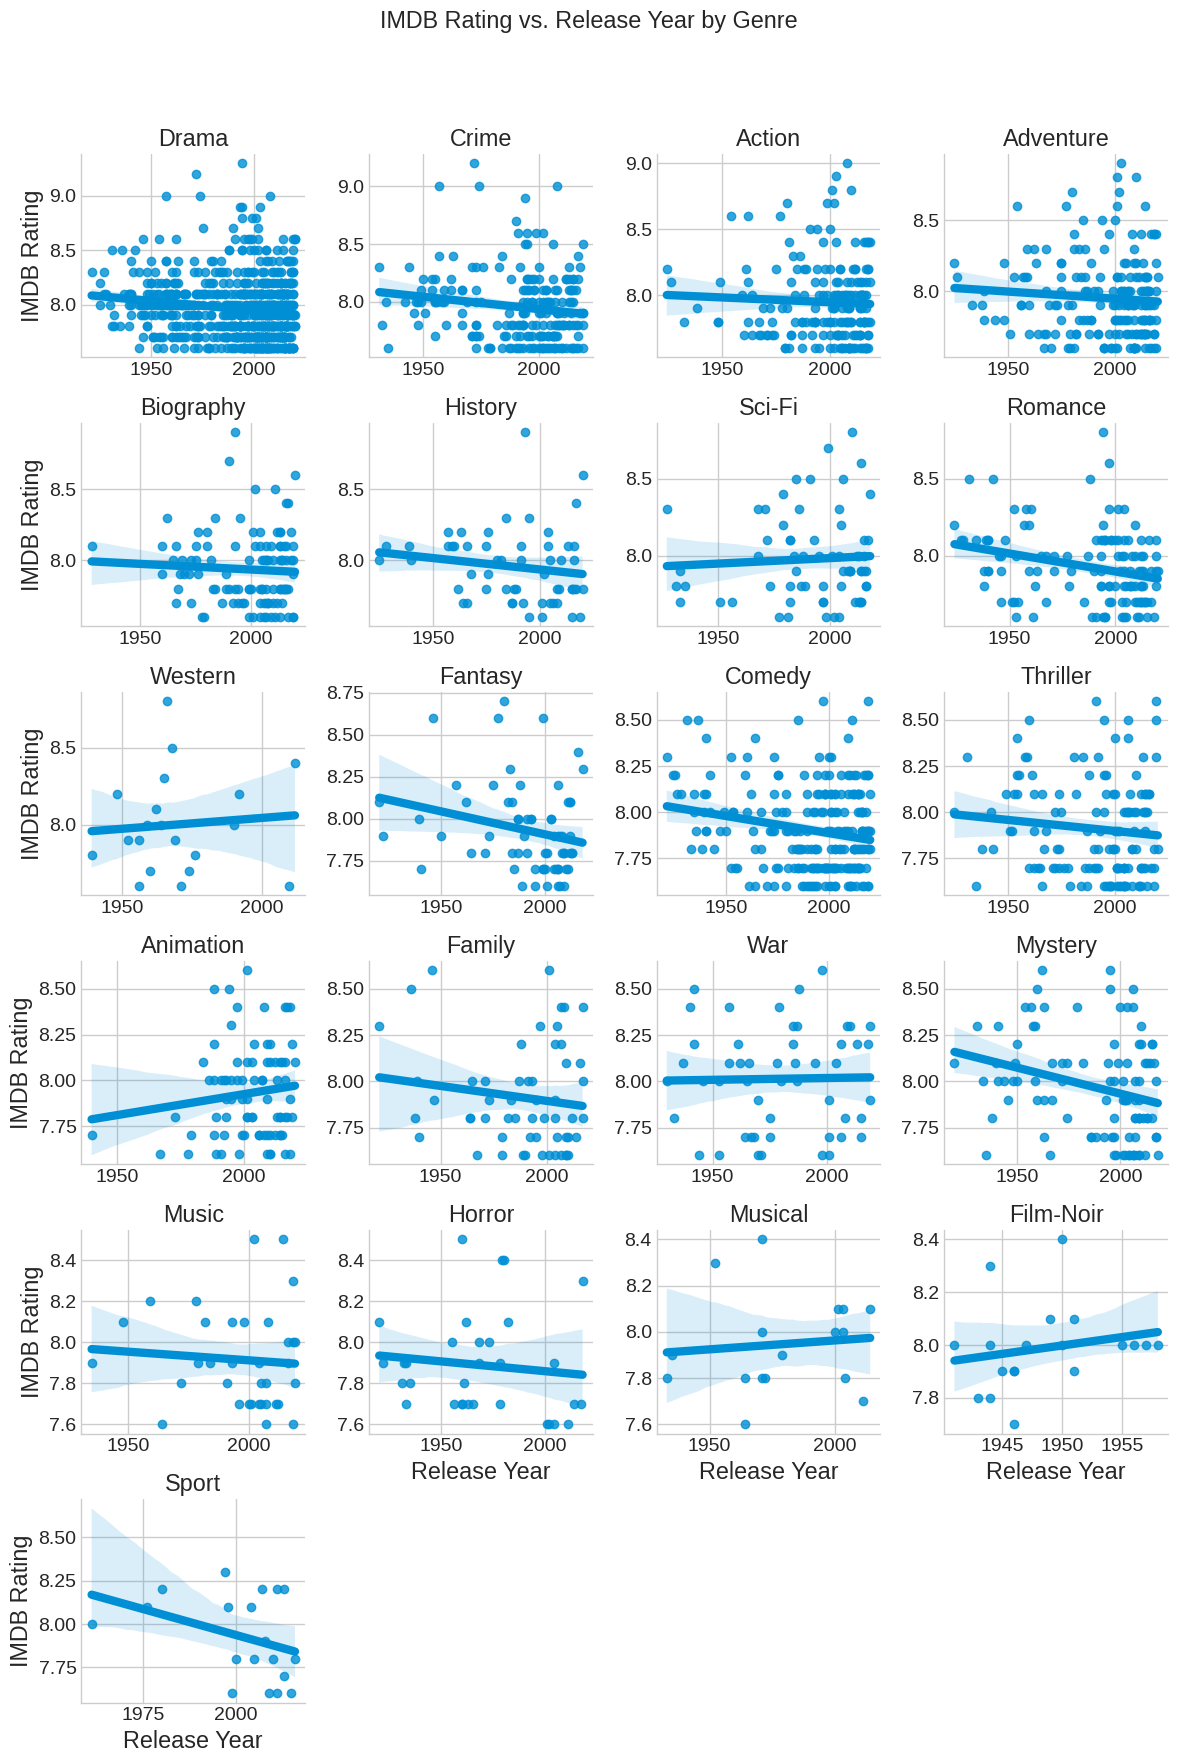

In [17]:
genres = movies['Genre'].str.split(', ')
data = {'Year': movies['Released_Year'].repeat(genres.str.len()), 'Genre': genres.explode(), 'Rating': movies['IMDB_Rating'].repeat(genres.str.len())}
new_df = pd.DataFrame(data)

g = sns.FacetGrid(new_df, col='Genre', col_wrap=4, sharex=False, sharey=False)
g.map(sns.regplot, 'Year', 'Rating')
g.set_titles('{col_name}')
g.set_axis_labels('Release Year', 'IMDB Rating')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('IMDB Rating vs. Release Year by Genre')
plt.show()



------
------
------
# --Beta--

